<a href="https://colab.research.google.com/github/Kashif5103/AI/blob/main/Classification%20of%20Scikit%20learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)
# ignore warning
import warnings
# set the futuure filter to ignore futureworking
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seaborn

Seaborn is a Python library built on top of Matplotlib for creating attractive and informative statistical graphics. Here's a brief overview of its key functionalities:

Visualizing Distributions:

Histograms (sns.histplot)
KDE plots (sns.kdeplot)
Rug plots (sns.rugplot)
Visualizing Relationships:

Scatter plots (sns.scatterplot)
Line plots (sns.lineplot)
Pair plots (sns.pairplot)
Visualizing Categorical Data:

Bar plots (sns.barplot)
Box plots (sns.boxplot)
Violin plots (sns.violinplot)
Strip plots (sns.stripplot)
Swarm plots (sns.swarmplot)
Matrix Plots:

Heatmaps (sns.heatmap)
Cluster maps (sns.clustermap)
Statistical Estimation:

Regression plots (sns.regplot, sns.lmplot)
Residual plots (sns.residplot)
Multi-plot Grids:

Facet Grids (sns.FacetGrid)
Pair Grids (sns.PairGrid)
Style and Color:

Themes (sns.set_theme, sns.set_style)
Color Palettes (sns.color_palette)
Data Management:

Loading datasets (sns.load_dataset)
Integration with Pandas: Works seamlessly with Pandas DataFrames for easy plotting.

# **Continous Colour Palettes**


Seaborn's continuous color palettes are designed to represent data that spans a gradient of values, making them ideal for heatmaps and other visualizations that require a smooth transition of colors. Here are the key features:

Sequential Palettes: Used for ordered data, showing a progression of color intensity.

Example: "Blues", "Greens"
python
Copy code
sns.heatmap(data, cmap="Blues")
Diverging Palettes: Highlight deviations from a central point, with two contrasting colors.

Example: "RdBu_r", "BrBG"
python
Copy code
sns.heatmap(data, cmap="RdBu_r")
Cubehelix Palette: Creates perceptually uniform gradients, useful for ensuring that differences in data are visible.

python
Copy code
cubehelix_palette = sns.cubehelix_palette(start=0.5, rot=-0.75, light=0.85, dark=0.15, as_cmap=True)
sns.heatmap(data, cmap=cubehelix_palette)
Light and Dark Palettes: Generate gradients with varying levels of lightness.

Light Palette Example:
python
Copy code
light_palette = sns.light_palette("navy", as_cmap=True)
sns.heatmap(data, cmap=light_palette)
Dark Palette Example:
python
Copy code
dark_palette = sns.dark_palette("purple", as_cmap=True)
sns.heatmap(data, cmap=dark_palette)
These continuous palettes help in visualizing data gradients effectively, making it easier to interpret variations and patterns in the data.

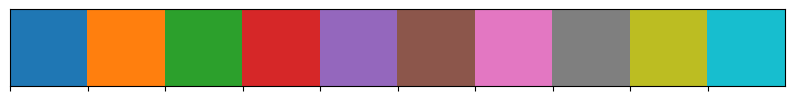

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

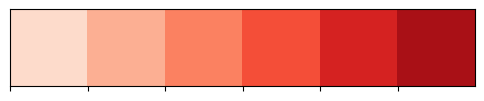

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set and display a specific color palette
palette = sns.color_palette("Reds")
sns.palplot(palette)
plt.show()


# Import Data



In [6]:
full_data=pd.read_csv('/content/Titanic-Dataset.csv')

In [7]:
full_data.shape

(891, 12)

In [8]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


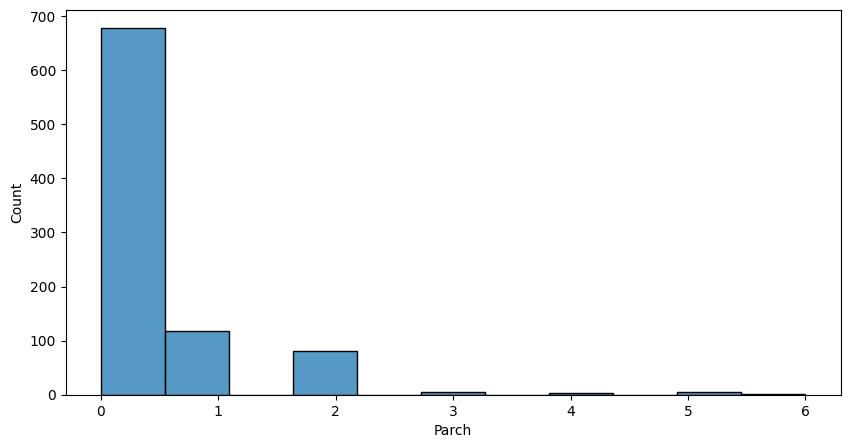

In [10]:
sns.histplot(full_data['Parch'],kde=False)
plt.show()

# **KDPLOT**
kernal disnity plot

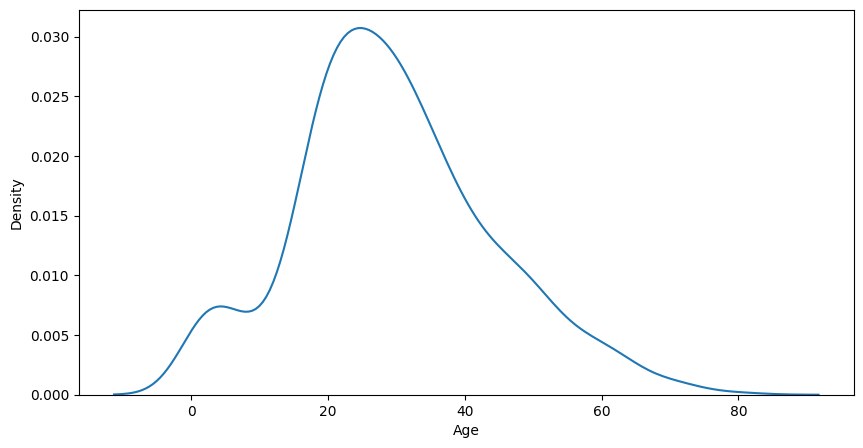

In [14]:
sns.distplot(full_data['Age'],hist=False)
plt.show()

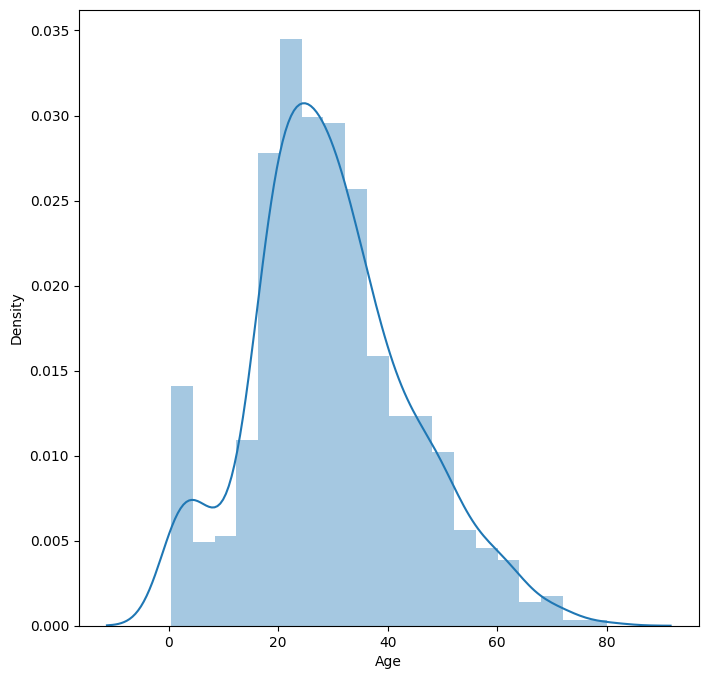

In [15]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['Age'])
plt.show()

In [16]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


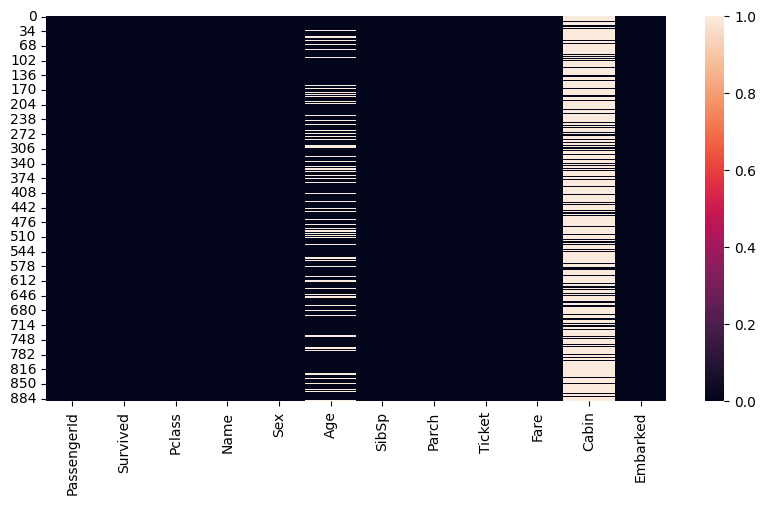

In [17]:
sns.heatmap(full_data.isnull())
plt.show()

In [18]:
#  implication function
def impute_age(cols):
    Age = cols[0]
    pclass = cols[1]
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24

# apply the function on the age coloum
full_data['Age'] = full_data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [19]:
# remove cabin feature
full_data.drop('Cabin',axis=1,inplace=True)

In [20]:
# remove rows with missing data
full_data.dropna(inplace=True)

In [21]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,S


In [22]:
# remove name and ticket
full_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [23]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,24.0,0,0,8.4583,Q
17,18,1,2,male,29.0,0,0,13.0000,S
19,20,1,3,female,24.0,0,0,7.2250,C
26,27,0,3,male,24.0,0,0,7.2250,C
28,29,1,3,female,24.0,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,24.0,0,0,7.2292,C
863,864,0,3,female,24.0,8,2,69.5500,S
868,869,0,3,male,24.0,0,0,9.5000,S
878,879,0,3,male,24.0,0,0,7.8958,S


In [24]:
# nimeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,26.514124,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,4.900264,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,24.000000,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,24.000000,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,24.000000,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,37.000000,8.000000,2.000000,227.525000


In [26]:
# identify the catagerecial features
full_data.select_dtypes(['category']).columns

Index([], dtype='object')